### Amsterdam’s Airbnb Market in 2018
Data Exploration


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Connect to the local database(Mongo DB)

In [2]:
# Module used to connect Python with MongoDb
import pymongo
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)


db = client.airbnb
calendar = db.airbnb.find()

print(calendar)


### Store CSV into DataFrame

In [3]:
csv_file = "./Data/listings_details.csv"
listing_df = pd.read_csv(csv_file,thousands=' ')
listing_df.head()
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20030 non-null  int64  
 1   listing_url                       20030 non-null  object 
 2   scrape_id                         20030 non-null  int64  
 3   last_scraped                      20030 non-null  object 
 4   name                              19992 non-null  object 
 5   summary                           19510 non-null  object 
 6   space                             14579 non-null  object 
 7   description                       19906 non-null  object 
 8   experiences_offered               20030 non-null  object 
 9   neighborhood_overview             13257 non-null  object 
 10  notes                             9031 non-null   object 
 11  transit                           13635 non-null  object 
 12  acce

D:\python\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
cleaned_list = listing_df.drop(columns=[ 'listing_url','interaction','beds','bedrooms','calculated_host_listings_count','is_business_travel_ready','jurisdiction_names','availability_365','availability_90','availability_60','medium_url','host_url','thumbnail_url','first_review','picture_url','xl_picture_url','cancellation_policy','license','house_rules','scrape_id','last_scraped','space','experiences_offered','requires_license','jurisdiction_names','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count'])
cleaned_list.head()
cleaned_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            20030 non-null  int64  
 1   name                          19992 non-null  object 
 2   summary                       19510 non-null  object 
 3   description                   19906 non-null  object 
 4   neighborhood_overview         13257 non-null  object 
 5   notes                         9031 non-null   object 
 6   transit                       13635 non-null  object 
 7   access                        12227 non-null  object 
 8   host_id                       20030 non-null  int64  
 9   host_name                     20026 non-null  object 
 10  host_since                    20026 non-null  object 
 11  host_location                 19991 non-null  object 
 12  host_about                    11803 non-null  object 
 13  h

### Review scores vs. Review numbers Regression Analysis

In [5]:
from sklearn import datasets
from scipy.stats import linregress


The correlation between both factors is nan


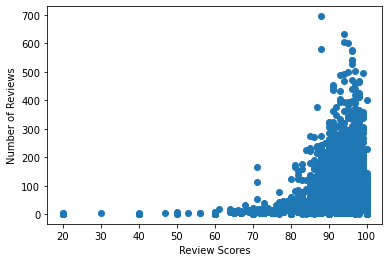

In [6]:
plt.scatter(cleaned_list.iloc[:,61],cleaned_list.iloc[:,59])
plt.xlabel('Review Scores')
plt.ylabel('Number of Reviews')
correlation = linregress(cleaned_list.iloc[:,59],cleaned_list.iloc[:,61])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [8]:
plt.savefig("../reviewsanalysis_Fig.01.png", bbox_inches = "tight")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

### Price change between seasons

In [9]:
cleaned_list=pd.DataFrame(cleaned_list)



In [10]:
cleaned_list['last_review']= pd.to_datetime(cleaned_list['last_review'])
cleaned_list['price']=pd.DataFrame(cleaned_list['price'])
cleaned_list['price']=pd.to_numeric(cleaned_list['price'].str.replace("$"," ").str.replace(",",""),errors ="ignore")
#cleaned_list.groupby(cleaned_list['last_review'].cleaned_list.strftime('%B'))['price'].sum().sort_values()
#price_df=cleaned_list.groupby([cleaned_list['last_review'].dt.year.rename('year'), cleaned_list['last_review'].dt.month_name().rename('month')]) ['price'].sum().reset_index()
price_df=cleaned_list['last_review'].dt.year.rename('year'), cleaned_list['last_review'].dt.month_name().rename('month'),cleaned_list['price']
price_df=pd.DataFrame(price_df)
price_df.head()
#month=price_df['month']
#price = price_df.groupby(month)['price'].mean()
#plt.bar(month, price, color='r', alpha=0.2, align="center")


<ipython-input-10-2cb15aa7a5b4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cleaned_list['price']=pd.to_numeric(cleaned_list['price'].str.replace("$"," ").str.replace(",",""),errors ="ignore")


,0,1,2,3,4,5,6,7,8,9,...,20020,20021,20022,20023,20024,20025,20026,20027,20028,20029
year,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2017.0,2018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,November,August,November,January,November,November,December,December,October,October,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,59.0,160.0,80.0,125.0,150.0,65.0,75.0,55.0,219.0,180.0,...,150.0,150.0,80.0,200.0,81.0,340.0,150.0,80.0,55.0,220.0


In [11]:
listing=price_df.transpose().dropna()
listing=pd.DataFrame(listing)

listing.head(128)


,year,month,price
0,2018.0,November,59.0
1,2018.0,August,160.0
2,2018.0,November,80.0
3,2018.0,January,125.0
4,2018.0,November,150.0
...,...,...,...
124,2018.0,June,150.0
125,2017.0,July,100.0
126,2018.0,January,168.0
127,2013.0,October,8000.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

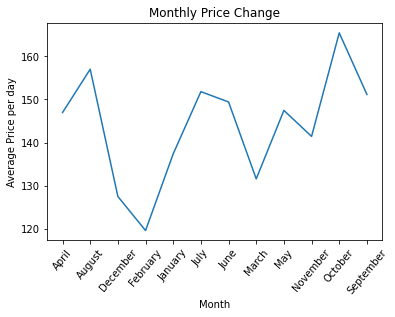

In [12]:
grouped2=pd.to_numeric(listing['price']).groupby(listing['month']).mean()
grouped2=pd.DataFrame(grouped2)
grouped2.head(12)

price=[146.97,157.01,127.52,119.63,137.41,151.81,149.42,131.60,147.47,141.44,165.43,151.17]
month=["April","August","December","February","January","July","June","March","May","November","October","September"]
plt.plot(month, price)
plt.title("Monthly Price Change")
plt.xlabel("Month")
plt.ylabel("Average Price per day")
#plt.bar(month, price, color='r', alpha=0.5, align="center")
plt.xticks(rotation=50)

In [15]:
plt.savefig("../pricechange_Fig.01.png", bbox_inches = "tight")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [16]:
csv_file = "./Data/calendar.csv"
calendar_df = pd.read_csv(csv_file, nrows= 10)
calendar_df.head()
#calendar_df.loc[calendar_df["listing_id"] ==2818]


,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [17]:
csv_file = "./Data/reviews_details.csv"
reviews_df = pd.read_csv(csv_file)
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [18]:
review_cleaned = reviews_df.drop(columns=['comments'])
review_cleaned.head()

,listing_id,id,date,reviewer_id,reviewer_name
0,2818,1191,2009-03-30,10952,Lam
1,2818,1771,2009-04-24,12798,Alice
2,2818,1989,2009-05-03,11869,Natalja
3,2818,2797,2009-05-18,14064,Enrique
4,2818,3151,2009-05-25,17977,Sherwin
